# Difference in Differences

# 1. Data simulation

Data obtained from [google
trends](https://trends.google.com/trends/explore?date=2015-01-01%202016-12-01&geo=US&q=Lord%20of%20the%20Rings,%2Fm%2F0fdv3&hl=en).
Google Trends are calculated based on resampling, so the data might be
slightly different every time you download it.

Reading the data

In [1]:
import pandas as pd
import causalimpact
import seaborn as sns
from numpy import where

weeks_post = 2

data = pd.read_csv("gtrends_sc.csv")
release_day = where(data.Week == "2015-12-20")[0][0]
data["Week"] = pd.to_datetime(data["Week"])

Ploting the data

<Axes: xlabel='Week', ylabel='III'>

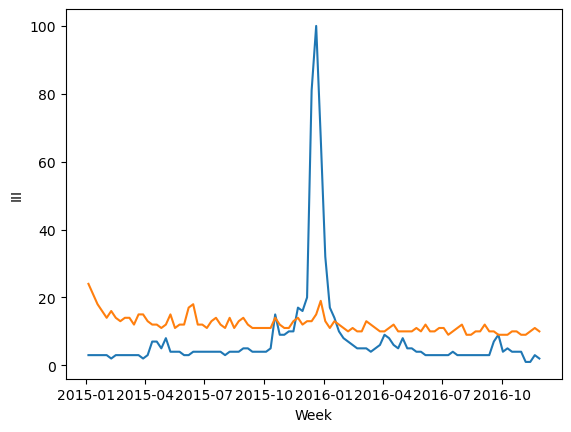

In [2]:
sns.lineplot(x="Week", y="III", data=data)
sns.lineplot(x="Week", y="LoTR", data=data)

Applying SC with the `CausalImpact` library.

In [6]:
data_CI = data[["III", "LoTR"]]
data_CI.columns = ["y", "x1"]
pre_period = [0, release_day - 1]
post_period = [release_day, release_day + weeks_post]

estimated_impact = causalimpact.fit_causalimpact(data_CI, pre_period, post_period)
print(causalimpact.summary(estimated_impact, output_format="summary"))


Posterior Inference {CausalImpact}
                          Average            Cumulative
Actual                    66.3               199.0
Prediction (s.d.)         6.5 (5.35)         19.6 (16.04)
95% CI                    [-4.4, 16.7]       [-13.2, 50.2]

Absolute effect (s.d.)    59.8 (5.35)        179.4 (16.04)
95% CI                    [49.6, 70.7]       [148.8, 212.2]

Relative effect (s.d.)    1131.4% (9797.8%)  1131.4% (9798.0%)
95% CI                    [-7108.1%, 10483.9%][-7108.1%, 10483.9%]

Posterior tail-area probability p: 0.001
Posterior prob. of a causal effect: 99.89%

For more details run the command: summary(impact, output_format="report")


The impact of the release on the interest of the III is 179.3 (148.3,
208.8).